In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

In [12]:
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

model = ChatGroq(model="qwen/qwen3-32b")

In [13]:
# REDUCER FUNCTION FOR CHATBOT
from langgraph.graph.message import add_messages

#Basemessage used here for human and ai messages

class ChatState(TypedDict):

  messages: Annotated[list[BaseMessage],add_messages]

In [14]:
def chat_node(state: ChatState):

  messages = state['messages']

  response = model.invoke(messages)

  return {'messages': [response]}

In [15]:
graph = StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile()

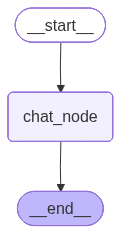

In [16]:
chatbot

In [19]:
initial_state = {
  'messages' : [HumanMessage(content='What is the definition of AGI')]
}

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the definition of AGI', additional_kwargs={}, response_metadata={}, id='d6aa51ed-b66c-4e75-b5b2-77060d33119c'),
  AIMessage(content="<think>\nOkay, I need to define AGI, which stands for Artificial General Intelligence. Let me start by recalling what I know. AGI is different from the current AI systems we have, like chatbots or recommendation algorithms. Those are called narrow AI because they're good at specific tasks but not beyond that.\n\nAGI would have the ability to understand, learn, and apply knowledge across a wide range of tasks, similar to how humans can do. So, it's not just about performing one task well but being adaptable. I should mention human-level or surpassing human intelligence in general problem-solving. Maybe include examples like solving complex problems in different domains, such as science, art, or engineering.\n\nI remember reading that AGI doesn't exist yet; it's a theoretical concept. Current AI systems are still 

In [20]:
chatbot.invoke(initial_state)['messages'][-1].content

"<think>\nOkay, I need to define AGI for the user. AGI stands for Artificial General Intelligence. Let me start by recalling what I know. AGI is different from Narrow AI, which is what most AI systems are today. Narrow AI is good at specific tasks, like recognizing images or translating languages, but AGI would be more like a human-level intelligence that can handle any intellectual task.\n\nFirst, I should mention that AGI is a hypothetical concept. It's not something we have yet. Then, I need to outline its key characteristics. Human-like adaptability is important because AGI should be able to learn and apply knowledge across various domains. Problem-solving and reasoning capabilities should be comparable to humans, maybe even beyond in some areas. Autonomy might be another point—AGI should operate independently without constant human oversight.\n\nI should also contrast it with Narrow AI to clarify the difference. Maybe give examples of each. For Narrow AI, things like voice assista

In [ ]:
while True:

  user_message = input('Type Here: ')

  print('User: ',user_message)

  if user_message.strip().lower() in ['exit','quit','bye']:
    break

  response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]})

  print('AI:', response['messages'][-1].content)

User:  hey how are you
AI: <think>
Okay, the user asked "how are you", which is a greeting. I should respond in a friendly and natural way. I need to consider that as an AI, I don't have real feelings, but I can express my simulated state. At the same time, I need to be concise and not make the response too long. I should also ask about the user's situation to show care, such as "How are you feeling today?". I need to keep the tone warm and conversational, avoiding overly formal or mechanical language. Finally, I should make sure the response is positive and welcoming, encouraging further interaction.
</think>

Hi there! I'm doing well, thank you! I'm always excited to chat and help out. How are you feeling today? 😊 I'd love to hear how your day is going!
User:  i am tasin
AI: <think>
Okay, the user wrote "i am tasin". Let me see. First, I should acknowledge their introduction. Maybe they want to talk about their name or something related. I need to respond in a friendly and open way. 